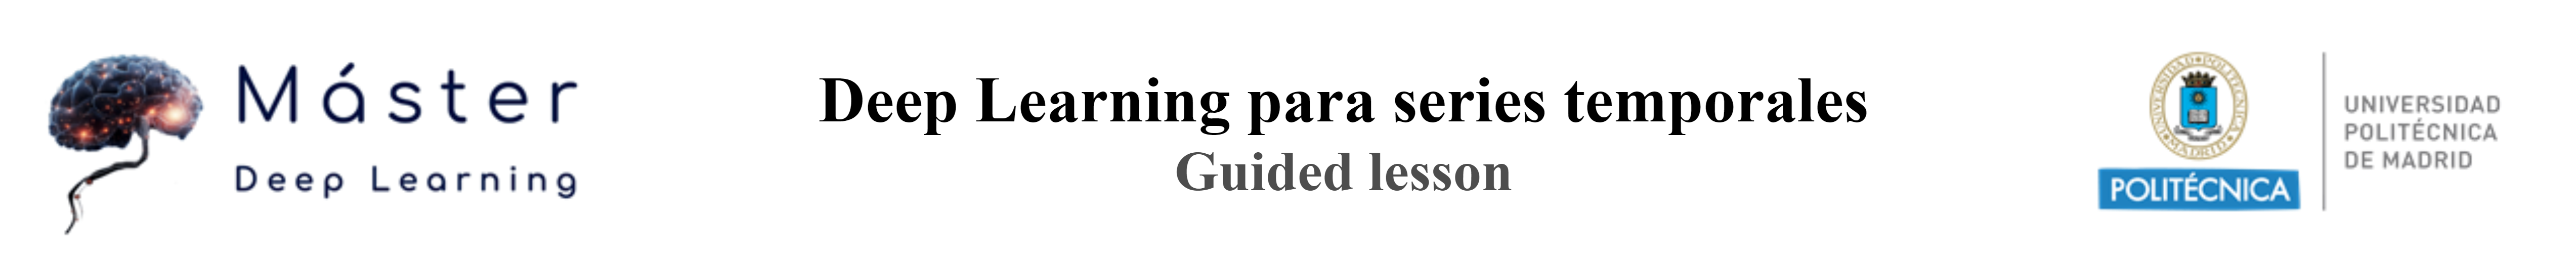

# Time Series  |   Part I: Introduction

This lesson introduces to time series:
- What are time series
- Where can we get time series from
- Types of time series: main charasteristics
- Time series decomposition

## Install dependencies

In [ ]:
# --- Saving as pdf libraries
#! pip install pypandoc
#! pip install pandoc
#! apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
#!apt-get install pandoc

## What are time series?  
> Identify temporal data  

Time series are sequences of data that relate events to timestamps. For example:  

- **Eating**: Morning, noon, evening, etc. We can record the kilocalories consumed during each meal to monitor strict weight control.  
- **Airport**: The number of planes departing from the terminals at specific times can be tracked to analyse airport activity and plan logistics.  
- **Weather**: Daily temperature readings, rainfall measurements, or wind speeds collected over time to predict future weather patterns or study climate change.  
- **Finance**: Stock prices recorded at regular intervals, such as hourly or daily, to analyse trends or make investment decisions.  
- **Retail**: Weekly or monthly sales data to identify patterns and forecast future product demand.  

### First example: Cat meals

One example is the meals of a cat during a day:

| Time   | Available food (gr) |
|--------|----------------------|
| 7:00 AM | 200                  |
| 11:00 AM | 150                 |
| 3:00 PM | 100                  |
| 7:00 PM | 50                   |
| 11:00 PM | 0                   |

This data forms a time series because it tracks the availability of food at specific intervals over time. By observing the pattern, we could predict when the food will be entirely consumed or plan the next feeding time to keep the cat fed regularly (or allowing the cat to have available food at all hours).

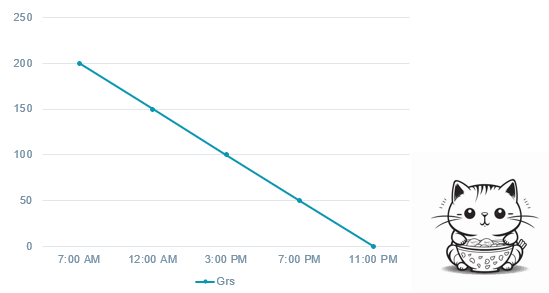

If our cat is so hungry and can't control himself... we will need to put lower quantity and refill! This changes the values of our time series.
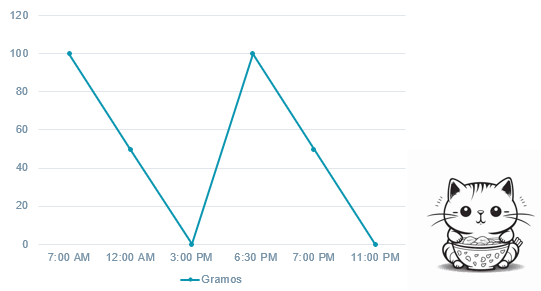


#### Store time series in python

In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

### Creating a first time series
> A time series is, by the end, an ordered sequence of data. Thus..
Which of this options may be a time series?

In [ ]:
raw_data_1 = [200,150,100,50,0]
raw_data_2 = set([200,150,100,50,0])
raw_data_3 = (200, 150, 100, 50, 0)
raw_data_4 = {0: 200, 1: 150, 2: 100, 3: 50, 4: 0}
raw_data_5 = "200,150,100,50,0"
class TimeSeries:
    def __init__(self, data):
        self.data = data

raw_data_6 = TimeSeries([200, 150, 100, 50, 0])
raw_data_7 = [[200], [150], [100], [50], [0]]
raw_data_8 = np.array( [200,150,100,50,0])
print(raw_data_1)
print(raw_data_2)
print(raw_data_3)
print(raw_data_4)
print(raw_data_5)
print(raw_data_6)
print(raw_data_7)
print(raw_data_8)

Can a time series have the same value in different timestamps? Which optiom seems good?

In [ ]:
raw_data = [200,150,100,50,0]

### Advantages and Disadvantages of Storing Time Series in Python


| Data Type                   | Advantages                                                                                   | Disadvantages                                                                                 |
|-----------------------------|-----------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------|
| **List (`raw_data_1`)**      | - Easy to use and manipulate.<br>- Supports duplicates.<br>- Flexible indexing.               | - No direct time indexing.<br>- Lacks vectorised operations (slower for large datasets).       |
| **Set (`raw_data_2`)**       | - Removes duplicates automatically.<br>- Fast membership testing (`x in set`).                | - Unordered (no inherent sequence).<br>- Cannot handle duplicate entries.<br>- No indexing.   |
| **Tuple (`raw_data_3`)**     | - Immutable (safe for storing static data).<br>- Supports indexing.                          | - Cannot modify data.<br>- No direct time indexing or metadata.                               |
| **Dictionary (`raw_data_4`)**| - Direct mapping of time indices to values.<br>- Fast lookups.<br>- More readable.            | - Higher memory usage compared to lists.<br>- No intrinsic ordering (before Python 3.7).      |
| **String (`raw_data_5`)**    | - Compact and lightweight.<br>- Easy for file storage and sharing.                           | - No direct manipulation without parsing.<br>- Inefficient for mathematical operations.       |
| **Class (`raw_data_6`)**     | - Customisable.<br>- Can include metadata and methods.                                        | - Requires implementation and debugging.<br>- Less intuitive for beginners.                  |
| **Nested List (`raw_data_7`)**| - Supports multidimensional data.<br>- Easy to group related values.                         | - More complex to manipulate.<br>- No direct indexing for time.                               |
| **NumPy Array (`raw_data_8`)**| - Efficient and fast.<br>- Supports vectorised operations.<br>- Many built-in functions.      | - Requires NumPy.<br>- Less readable for beginners.<br>- Lacks direct time indexing.          

### Store as pandas DataFrame

In [ ]:

raw_data_9 = pd.DataFrame({
    "Time": ["7:00 AM", "11:00 AM", "03:00 PM", "07:00 PM", "11:00 PM"],
    "Available food (gr)": raw_data
})

display(raw_data_9.head())

### Show the information

In [ ]:
# Index
print(f"Index: {raw_data_9.index}")
# Columns names
print(f"Columns: {raw_data_9.columns}")
# Values by column name
print(f"Values column Time: {raw_data_9['Time'].values}")
print(f"Values column Available food (gr): {raw_data_9['Available food (gr)'].values}")
# Values by column position
print(f"Values column 0: {raw_data_9.iloc[:,0].values}")
print(f"Values column 1: {raw_data_9.iloc[:,1].values}")
# Values by row position
print(f"Values row 3: {raw_data_9.iloc[3,:].values}")


In [ ]:
raw_data_9["Time"].__class__

## A bit of theory
Now, let's take a look to the main charasteristics of time series.

### Univariate vs Multivariate time series

In [ ]:
univariate = pd.DataFrame({
    "Available food (gr)": [100, 50, 0, 100, 50,0]
})

multivariate = pd.DataFrame({
    "Reffilled food (gr)": [100, 0, 0, 100, 0, 0],
    "Eaten food (gr)": [0, 50, 50, 0, 50, 50]
})
timestamps = ["7:00 AM", "11:00 AM", "03:00 PM", "06:30 PM", "07:00 PM", "10:00 PM"]
univariate.index = timestamps
multivariate.index = timestamps
display(univariate)
display(multivariate)

In [ ]:
univariate.index = timestamps
multivariate.index = timestamps
univariate.plot()
multivariate.plot()

### Stationarity
A time series can be (or not) stationary in time on mean and/or variance. This means that the mean/variance depends (or not) on the time. Let's check two examples.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
x_new = np.linspace(0, 10, 100)
y_mean_dependent = np.sin(x_new) + 0.1 * x_new
y_variance_dependent = np.sin(x_new) * (0.2 * x_new)
y_mean_independent = np.sin(x_new)
y_variance_independent = np.sin(x_new) * 1.5

# Subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8), constrained_layout=True)

# Mean dependent
axs[0, 0].plot(x_new, y_mean_dependent, 'k')
axs[0, 0].plot(x_new, 0.1 * x_new, 'b--')
axs[0, 0].set_title('Mean dependent on time', fontsize=14)
axs[0, 0].grid(True)

# Variance dependent
axs[0, 1].plot(x_new, y_variance_dependent, 'k')
axs[0, 1].fill_between(x_new, -0.2 * x_new, 0.2 * x_new, color='b', alpha=0.1)
axs[0, 1].set_title('Variance dependent on time', fontsize=14)
axs[0, 1].grid(True)

# Mean independent
axs[1, 0].plot(x_new, y_mean_independent, 'k')
axs[1, 0].axhline(y=0, color='b', linestyle='--')
axs[1, 0].set_title('Mean independent on time', fontsize=14)
axs[1, 0].grid(True)

# Variance independent
axs[1, 1].plot(x_new, y_variance_independent, 'k')
axs[1, 1].fill_between(x_new, -1.5, 1.5, color='b', alpha=0.1)
axs[1, 1].set_title('Variance independent on time', fontsize=14)
axs[1, 1].grid(True)

# Plot
plt.tight_layout()
plt.show()


See that:
- Mean dependent on time can be translated to "the mean of values get upper/lower across the time".
- Variance dependent on time can be translated to "the amplitude of the values vary across the time".

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data generation
np.random.seed(42)
x = np.linspace(0, 50, 500)  # Longer time series

# Define a sinusoidal pattern with noise
base_series = 5 * np.sin(0.1 * x) + np.random.normal(scale=2, size=len(x))

# Function to calculate moving average
def moving_average(series, window_size):
    return np.convolve(series, np.ones(window_size) / window_size, mode='same')

# Function to calculate rolling standard deviation
def rolling_std(series, window_size):
    half_window = window_size // 2
    padded_series = np.pad(series, (half_window, half_window), mode='edge')
    stds = [
        np.std(padded_series[i : i + window_size]) for i in range(len(series))
    ]
    return np.array(stds)

# Parameters
w = 20  # Window size
mean_dependent = moving_average(base_series, window_size=w)
std_dependent = rolling_std(base_series, window_size=w)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, base_series, label='Original Time Series', color='blue')
ax.plot(x, mean_dependent, label=f'Moving Average (Surrounding {w} Points)', linestyle='--', color='orange')

# Adding variance shading
ax.fill_between(
    x,
    mean_dependent - std_dependent,
    mean_dependent + std_dependent,
    color='orange',
    alpha=0.3,
    label='Variance (±1 Std Dev)',
)

# Labels, legend, and grid
ax.set_title('Time Series with Moving Average and Variance', fontsize=16)
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


#### Examples of stationary/non stationary time series

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data generation
np.random.seed(42)
x = np.linspace(0, 10, 500)

# Define the components for the plots
# 1. Stationary mean, stationary variance
y1 = np.random.normal(0, 1, len(x))

# 2. Non-stationary mean, stationary variance
mean2 = 0.5 * x
y2 = mean2 + np.random.normal(0, 1, len(x))

# 3. Stationary mean, non-stationary variance
std3 = 0.1 + 0.1 * x
y3 = np.random.normal(0, std3)

# 4. Non-stationary mean, non-stationary variance
mean4 = 0.5 * np.sin(x)
std4 = 0.1 + 0.1 * x
y4 = mean4 + np.random.normal(0, std4)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Stationary mean, stationary variance
axs[0, 0].plot(x, y1, color='red')
axs[0, 0].axhline(0, color='black', linestyle='--')
axs[0, 0].fill_between(x, -1, 1, color='red', alpha=0.2)
axs[0, 0].set_title('Stationary mean\nStationary variance')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Value')

# Plot 2: Non-stationary mean, stationary variance
axs[0, 1].plot(x, y2, color='green')
axs[0, 1].plot(x, mean2, 'k--')
axs[0, 1].fill_between(x, mean2 - 1, mean2 + 1, color='green', alpha=0.2)
axs[0, 1].set_title('Non-stationary mean\nStationary variance')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Value')

# Plot 3: Stationary mean, non-stationary variance
axs[1, 0].plot(x, y3, color='blue')
axs[1, 0].axhline(0, color='black', linestyle='--')
axs[1, 0].fill_between(x, -std3, std3, color='blue', alpha=0.2)
axs[1, 0].set_title('Stationary mean\nNon-stationary variance')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Value')

# Plot 4: Non-stationary mean, non-stationary variance
axs[1, 1].plot(x, y4, color='purple')
axs[1, 1].plot(x, mean4, 'k--')
axs[1, 1].fill_between(x, mean4 - std4, mean4 + std4, color='purple', alpha=0.2)
axs[1, 1].set_title('Non-stationary mean\nNon-stationary variance')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Value')

# Adjust layout
plt.tight_layout()
plt.show()


### Length
Number of timestamps

In [ ]:
univariate = pd.DataFrame({
    "Available food (gr)": [100, 50, 0, 100, 50,0]
})

multivariate = pd.DataFrame({
    "Reffilled food (gr)": [100, 0, 0, 100, 0, 0],
    "Eaten food (gr)": [0, 50, 50, 0, 50, 50]
})
timestamps = ["7AM", "12AM", "03PM", "06:30PM", "07:00PM", "10:00PM"]
univariate.index = timestamps
multivariate.index = timestamps
display(univariate)
display(multivariate)

In [ ]:
# Univariate or multivariate?
print(f"Univariate or multivariate? Univariate: {len(univariate.columns)}")
print(f"Univariate or multivariate? Multivariate: {len(multivariate.columns)}")
print("---")
# Using size
print(f"Univariate length: {univariate.size}")
print(f"Multivariate length: {multivariate.size}")
print("---")
# Using shape
print(f"Univariate length: {univariate.shape[0]}")
print(f"Multivariate length: {multivariate.shape[0]}")
print("---")
print(f"Univariate number of columns: {univariate.shape[1]}")
print(f"Multivariate number of columns: {multivariate.shape[1]}")

Suppose an alarm sounds when we get the middle of food or 0 food. Then, it will sound at 11:00 AM, 03:00 PM, 07:00PM and  10:00PM.

If we only annotate the alarm when it sounds,
... What do we do? We have different lengths!!
And... The third raw column values timestamps will not correspond to the other's timestamps

In [ ]:
timestamps = ["07:00 AM", "11:00 AM", "03:00 PM", "06:30 PM", "07:00 PM", "10:00 PM"]
timestamps2 = ["07:00 AM", "11:00 AM", "06:30 PM", "07:00 PM", "10:00 PM"]

In [ ]:
print (len(timestamps))
print (len(timestamps2))

We cannot do anything to select a length... as we would get something like:

In [ ]:
multivariate_non_equal = pd.DataFrame({
    "Reffilled food (gr)": [100, 0, 0, 100, 0, 0],
    "Eaten food (gr)": [0, 50, 50, 0, 50, 50],
    "Alarm (Hzs)": [5000, 2000, 5000, 2000, 5000, np.nan]
})
multivariate_non_equal.plot()

But, the timestamps are the same on the previous index avoiding one step!! If the alarm does not sound, that is 0 Hzs. We can fit the hole!

In [ ]:
multivariate_with_alarm = pd.DataFrame({
    "Reffilled food (gr)": [100, 0, 0, 100, 0, 0],
    "Eaten food (gr)": [0, 50, 50, 0, 50, 50],
    "Alarm (Hzs)": [5000, 2000, 0, 5000, 2000, 5000]
})
multivariate_with_alarm.index = timestamps
multivariate_with_alarm.plot()

In order to see it correctly, we can do a little magic with the plot.

In [ ]:
# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first two variables on the primary y-axis
ax1.plot(multivariate_with_alarm.index, multivariate_with_alarm["Reffilled food (gr)"], label="Reffilled food (gr)", marker="o")
ax1.plot(multivariate_with_alarm.index, multivariate_with_alarm["Eaten food (gr)"], label="Eaten food (gr)", marker="x")
ax1.set_xlabel("Time")
ax1.set_ylabel("Food (gr)")
ax1.legend(loc="upper left")
ax1.grid()

# Create a secondary y-axis for the third variable
ax2 = ax1.twinx()
ax2.plot(multivariate_with_alarm.index, multivariate_with_alarm["Alarm (Hzs)"], label="Alarm (Hzs)", color="red", linestyle="--", marker="d")
ax2.set_ylabel("Alarm (Hzs)")
ax2.legend(loc="upper right")

# Title and show plot
plt.title("Multivariate Time Series with Different Scales")
plt.show()

### Evenly / Non evenly spaced

We have defined two univariate time series until now:

In [ ]:
univariate_1 = pd.DataFrame({
    "Time": ["7:00 AM", "11:00 AM", "3:00 PM", "7:00 PM", "11:00 PM"],
    "Available food (gr)": raw_data
})
univariate_2 = pd.DataFrame({
    "Available food (gr)": [100, 50, 0, 100, 50,0]
})

timestamps = ["07:00 AM", "11:00 AM", "03:00 PM", "06:30 PM", "07:00 PM", "10:00 PM"]
univariate_2.index = timestamps
display(univariate_1)
display(univariate_2)

How much time is between each timestamps?

In [ ]:
# Calculate differences
differences_1 = np.diff([7, 11, 15, 19, 23])
differences_2 = np.diff([7, 11, 15, 18.5, 19, 23])

# Combine the unique values and their counts to split between red and blue segments
combined_differences = np.concatenate([differences_1, differences_2])

# Count occurrences of each difference
unique_values, counts = np.unique(combined_differences, return_counts=True)

# Calculate red and blue heights
red_heights = [min(counts)] * len(unique_values)  # Base level (red segment starts at 0)
blue_heights = counts - red_heights  # Blue starts where red ends

# Generate string labels for the differences
difference_labels = [f"Diff {val}" for val in unique_values]

# Plot
plt.figure(figsize=(8, 5))

# Plot red segments (lower part)
plt.bar(difference_labels, red_heights, color='lightcoral', width=0.8, label="Red Segment (Second univariate series)", alpha=0.7)

# Plot blue segments (upper part)
plt.bar(difference_labels, blue_heights, bottom=red_heights, color='lightblue', width=0.8, label="Blue Segment (First univariate series)", alpha=0.9)

# Customize the plot
plt.title("Split Bars for Unique Differences (Categorical Labels)")
plt.xlabel("Difference Values")
plt.ylabel("Cumulative Levels")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In the first case we got an evenly space dataset, as all distances are the same. In the second case... we have a non-evenly space dataset so we could have a problem when analyzing the time series. => We will fix this in next class! (preprocess data/ETL)

### Classical decomposition

Classical decomposition methods are used in time series analysis to break down a series into its fundamental components: **trend**, **seasonality**, and **residuals**. The decomposition can help in understanding the underlying patterns and preparing the data for forecasting or analysis.

#### Types of Decomposition

1. **Additive Decomposition**:
   - Assumes the components combine linearly:
     
     Y(t) = T(t) + S(t) + R(t)
     
     where \(Y(t)\) is the observed value, \(T(t)\) is the trend, \(S(t)\) is the seasonality, and \(R(t)\) is the residual.
   - Suitable when the magnitude of seasonality and residuals is constant over time.

2. **Multiplicative Decomposition**:
   - Assumes the components combine proportionally:
     
     Y(t) = T(t) \times S(t) \times R(t)
     
   - Suitable when the seasonality and residuals grow or shrink with the trend.

3. **Mixed Decomposition**:
   - A combination of additive and multiplicative models:
     
     Y(t) = T(t) + T(t) \times S(t) + R(t)
     
   - Useful when both additive and proportional relationships are present.

The most used is the additive decomposition.

#### Reference for Further Reading:

- [Paper with definition of additive, multiplicative and mixed decomposition](https://www.researchgate.net/profile/Kelechukwu-Dozie-2/publication/358537763_Choice_between_Mixed_and_Multiplicative_Models_in_Time_Series_Decomposition/links/6206c84aafa8884cabda3620/Choice-between-Mixed-and-Multiplicative-Models-in-Time-Series-Decomposition.pdf). Check to see de advantages and disadvantages.

### Generate time series using additive decomposition

In [ ]:
import numpy as np
import pandas as pd

def generate_additive_time_series(length=100, noise_percentage=10, trend_slope=0.5, seasonality_range=20):
    """
    Generate an additive time series with specified characteristics.

    Parameters:
        length (int): Length of the time series.
        noise_percentage (float): Percentage of noise to add to the series.
        trend_slope (float): Slope of the trend component.
        seasonality_range (float): Amplitude of the seasonal component.

    Returns:
        pd.DataFrame: A DataFrame containing the components and the resulting time series.
    """
    # Time index
    time = np.arange(length)

    # Generate components
    trend = trend_slope * time
    seasonality = seasonality_range * np.sin(2 * np.pi * time / length * 12)  # 12-period seasonality
    noise = (noise_percentage / 100) * np.random.randn(length) * np.max(np.abs(seasonality + trend))

    # Combine components
    series = trend + seasonality + noise

    # Create DataFrame
    data = pd.DataFrame({
        "Trend": trend,
        "Seasonality": seasonality,
        "Noise": noise,
        "Series": series
    })

    return data


In [ ]:
# Generate a time series with custom parameters
generated_series = generate_additive_time_series(
    length=120,
    noise_percentage=3,
    trend_slope=0.3,
    seasonality_range=25
)

# Display the first few rows
print(generated_series.head())

In [ ]:
generated_series.plot()

Let's visualize the plot in a better way...

In [ ]:
import matplotlib.pyplot as plt

def plot_additive_decomposition(dataframe, figsize=(15, 4), final_figsize=(15, 6)):
    """
    Plots an additive decomposition of a time series with trend, seasonality, noise,
    and the final series in a structured format.

    Parameters:
        dataframe (pd.DataFrame): DataFrame containing columns 'Trend', 'Seasonality',
                                  'Noise', and 'Series'.
        figsize (tuple): Figure size for the row of components (trend, seasonality, noise, and symbols).
        final_figsize (tuple): Figure size for the larger subplot (final series).
    """
    fig, axs = plt.subplots(1, 5, figsize=figsize, gridspec_kw={'width_ratios': [3, 0.5, 3, 0.5, 3]})

    # Plot Trend
    axs[0].plot(dataframe.index, dataframe["Trend"], label="Trend", color="blue")
    axs[0].set_title("Trend")
    axs[0].grid()
    axs[0].legend()

    # Draw "+"
    axs[1].text(0.5, 0.5, "+", fontsize=20, ha='center', va='center', transform=axs[1].transAxes)
    axs[1].axis('off')

    # Plot Seasonality
    axs[2].plot(dataframe.index, dataframe["Seasonality"], label="Seasonality", color="green")
    axs[2].set_title("Seasonality")
    axs[2].grid()
    axs[2].legend()

    # Draw "+"
    axs[3].text(0.5, 0.5, "+", fontsize=20, ha='center', va='center', transform=axs[3].transAxes)
    axs[3].axis('off')

    # Plot Noise
    axs[4].plot(dataframe.index, dataframe["Noise"], label="Noise", color="orange")
    axs[4].set_title("Noise")
    axs[4].grid()
    axs[4].legend()

    # Adjust layout for the first row
    plt.tight_layout()
    plt.show()

    # Draw "=" and plot Final Series
    fig, ax = plt.subplots(figsize=(final_figsize))
    ax.text(0.5, 0.5, "=", fontsize=20, ha='center', va='center', transform=ax.transAxes)
    ax.axis('off')
    plt.show()

    fig, ax = plt.subplots(figsize=(final_figsize))
    ax.plot(dataframe.index, dataframe["Series"], label="Final Series", color="red")
    ax.set_title("Final Additive Series")
    ax.grid()
    ax.legend()
    plt.show()

In [ ]:
# Generate a time series with custom parameters
generated_series = generate_additive_time_series(
    length=120,
    noise_percentage=7,
    trend_slope=1,
    seasonality_range=25
)

# Display the first few rows
print(generated_series.head())
plot_additive_decomposition(generated_series, figsize=(15, 2), final_figsize=(5, 2))

### Approximate time series getting its additive decomposition

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
result_synthetic = seasonal_decompose(generated_series["Series"], model='additive', period=25)
result_synthetic.plot()
plt.show()

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount("/content/drive")
nbs_path =  '/content/drive/MyDrive/SERTEMP-Collab'
nbs_name = '01_Introduction'
! ls {nbs_path}/{nbs_name}.ipynb
!jupyter nbconvert --to PDF {nbs_path}/{nbs_name}.ipynb --output /{nbs_path}/{nbs_name}.pdf
files.download(f'{nbs_path}/{nbs_name}.pdf')